In [11]:
import pyproj
import xarray as xr
import numpy as np
import cartopy
import proplot as pplt

import warnings
warnings.simplefilter("ignore")

In [12]:
#define variables
rainfields_file = '66_20201031_050100.gndrefl.nc'

In [13]:
#open rainfields 3 file
with xr.open_dataset(rainfields_file) as ds:
    radar_lat = ds.proj.latitude_of_projection_origin
    radar_lon = ds.proj.longitude_of_central_meridian
    x_grid, y_grid = np.meshgrid(ds.x.data, ds.y.data)
    reflectivity = ds.reflectivity.data

#create latlon projection
proj = pyproj.Proj(proj='aea', lat_1=ds.proj.standard_parallel[0], lat_2=ds.proj.standard_parallel[1],
                        lat_0=ds.proj.latitude_of_projection_origin, lon_0=ds.proj.longitude_of_central_meridian,
                        x_0=0, y_0=0)

lon_grid, lat_grid = proj(x_grid*1000, y_grid*1000, inverse=True)

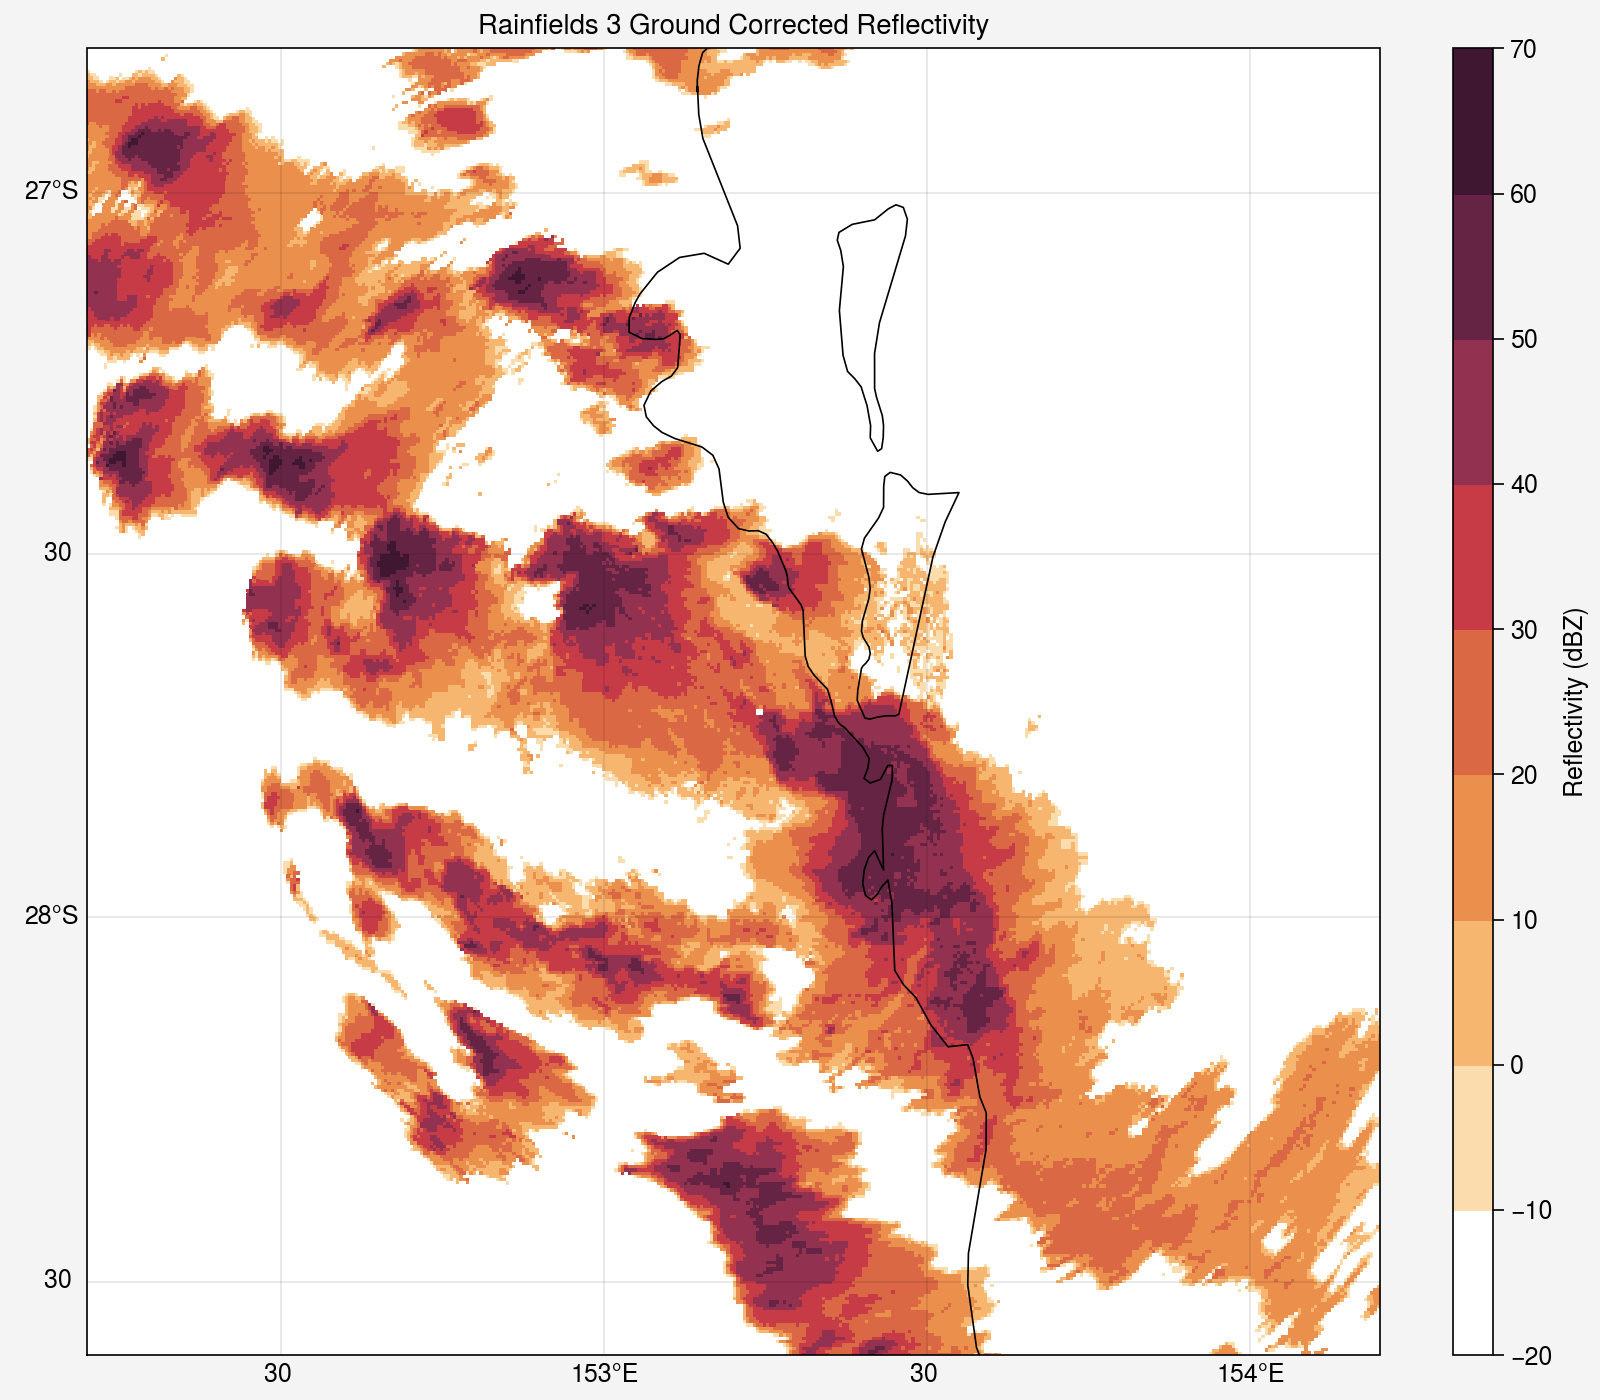

In [20]:
#create plot
pplt.rc.reso = 'xx-hi'
fig = pplt.figure(figsize=(8,7))
ax = fig.subplot(projection='merc')
#plot rain
p = ax.pcolormesh(lon_grid, lat_grid, reflectivity, colorbar=True, cmap='Fire', vmin=-20, vmax=70, colorbar_kw={'label': 'Reflectivity (dBZ)'})

ax.format(lonlim=(152.2, 154.2), latlim=(-28.6, -26.8), latlines=0.5, lonlines=0.5, coast=True, lonlabels='b', latlabels='l',
         title='Rainfields 3 Ground Corrected Reflectivity')
